In [36]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from scipy.stats import linregress



In [2]:
# Read in spreadsheet
from google.colab import drive
import os
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read CSV file directly without changing directory
file_path = '/content/drive/My Drive/Colab Notebooks/Resources/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes_df = pd.read_csv(file_path)
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Take a look at the dataset
diabetes_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [28]:
# How many had diabetes vs didn't have diabetes
total_count = diabetes_df['Diabetes_binary'].count()
diabetes_count = diabetes_df.groupby('Diabetes_binary')['Diabetes_binary'].count(),
diabetes_count

Diabetes_binary
0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [16]:
# What percentage of total respondendts had diabetes vs didn't
total_count = diabetes_df['Diabetes_binary'].count()
round((diabetes_df.groupby('Diabetes_binary')['Diabetes_binary'].count()/total_count)*100, 2)


Diabetes_binary
0.0    86.07
1.0    13.93
Name: Diabetes_binary, dtype: float64

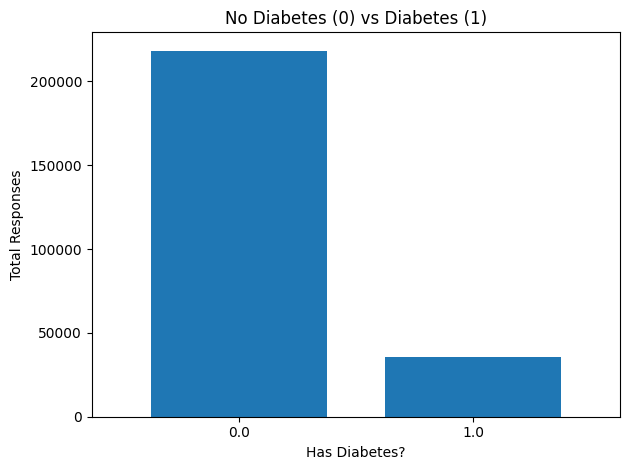

In [31]:
## Plotted out the results
diabetes_count.plot(kind="bar", width=.75)
plt.xticks(rotation=0, ha='center')
plt.xlabel("Has Diabetes?")
plt.ylabel("Total Responses")
plt.title("No Diabetes (0) vs Diabetes (1)")

plt.tight_layout()


In [35]:
# Check Average BMI Score for people with and without Diabetes
bmi_df = diabetes_df.groupby('Diabetes_binary').mean()
bmi_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,0.376602,0.384297,0.957730,27.805770,0.431019,0.032171,0.073351,0.776943,0.642158,0.820326,...,0.949641,0.080665,2.385185,2.978034,3.641082,0.135361,0.434064,7.814065,5.099797,6.190474
1.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,0.756408,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094


The r-value is: 0.21684306020311875


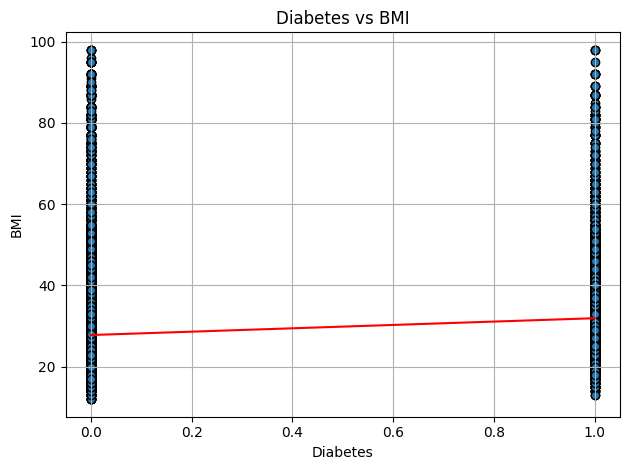

In [38]:
# Wanted to look at the relationship between BMI and people with Diabetes
x_values = diabetes_df["Diabetes_binary"]
y_values = diabetes_df["BMI"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# We first created a scatter plot to show the results from the DataFrame using my desired columns
plt.scatter(x_values,y_values, marker="o", edgecolor="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Diabetes vs BMI")
plt.ylabel("BMI")
plt.xlabel("Diabetes")
plt.grid(True)

print(f"The r-value is: {rvalue}")

plt.tight_layout()


The r-value is: 0.177282257807203


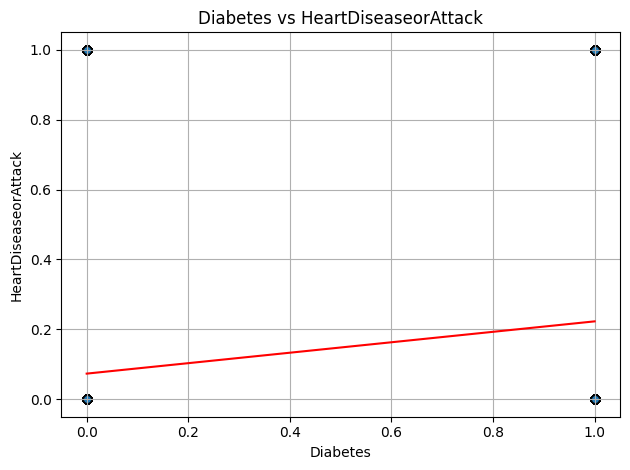

In [39]:
# Wanted to look at the relationship between Heart Disease or Attack and Diabetes
x_values = diabetes_df["Diabetes_binary"]
y_values = diabetes_df["HeartDiseaseorAttack"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# We first created a scatter plot to show the results from the DataFrame using my desired columns
plt.scatter(x_values,y_values, marker="o", edgecolor="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Diabetes vs HeartDiseaseorAttack")
plt.ylabel("HeartDiseaseorAttack")
plt.xlabel("Diabetes")
plt.grid(True)

print(f"The r-value is: {rvalue}")

plt.tight_layout()


The r-value is: 0.26312878992336264


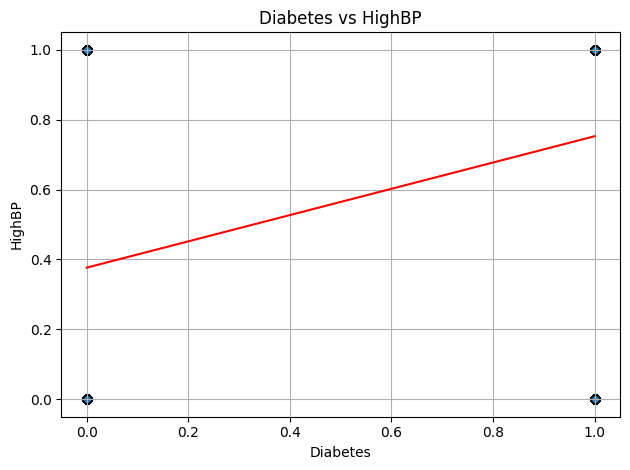

In [40]:
# Wanted to look at the relationship between HighBP and Diabetes
x_values = diabetes_df["Diabetes_binary"]
y_values = diabetes_df["HighBP"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# We first created a scatter plot to show the results from the DataFrame using my desired columns
plt.scatter(x_values,y_values, marker="o", edgecolor="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Diabetes vs HighBP")
plt.ylabel("HighBP")
plt.xlabel("Diabetes")
plt.grid(True)

print(f"The r-value is: {rvalue}")

plt.tight_layout()
